# Cat Boosting Classification


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from catboost import CatBoostClassifier
from joblib import dump
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)

Learning rate set to 0.00666
0:	learn: 0.6866111	total: 56.7ms	remaining: 56.6s
1:	learn: 0.6791125	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6715202	total: 57.8ms	remaining: 19.2s
3:	learn: 0.6655086	total: 58.3ms	remaining: 14.5s
4:	learn: 0.6586539	total: 58.8ms	remaining: 11.7s
5:	learn: 0.6511786	total: 59.2ms	remaining: 9.81s
6:	learn: 0.6443408	total: 59.7ms	remaining: 8.47s
7:	learn: 0.6367443	total: 60.6ms	remaining: 7.52s
8:	learn: 0.6298102	total: 61.1ms	remaining: 6.73s
9:	learn: 0.6246775	total: 62.1ms	remaining: 6.15s
10:	learn: 0.6184678	total: 62.6ms	remaining: 5.63s
11:	learn: 0.6118937	total: 62.9ms	remaining: 5.18s
12:	learn: 0.6055787	total: 63.3ms	remaining: 4.8s
13:	learn: 0.5982946	total: 63.7ms	remaining: 4.49s
14:	learn: 0.5928761	total: 64.1ms	remaining: 4.21s
15:	learn: 0.5870719	total: 64.5ms	remaining: 3.97s
16:	learn: 0.5811562	total: 65ms	remaining: 3.76s
17:	learn: 0.5751259	total: 65.4ms	remaining: 3.57s
18:	learn: 0.5698460	total: 65.9ms	remaining: 3.

In [6]:
cbc_con_matrix = confusion_matrix(y_test, y_pred)
abc_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix", "\n", cbc_con_matrix, "\n")
print("Accuracy of Adaptive Boosting Classification :", abc_acc * 100, "\n")
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[30  2]
 [ 1  7]] 

Accuracy of Adaptive Boosting Classification : 92.5 

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40



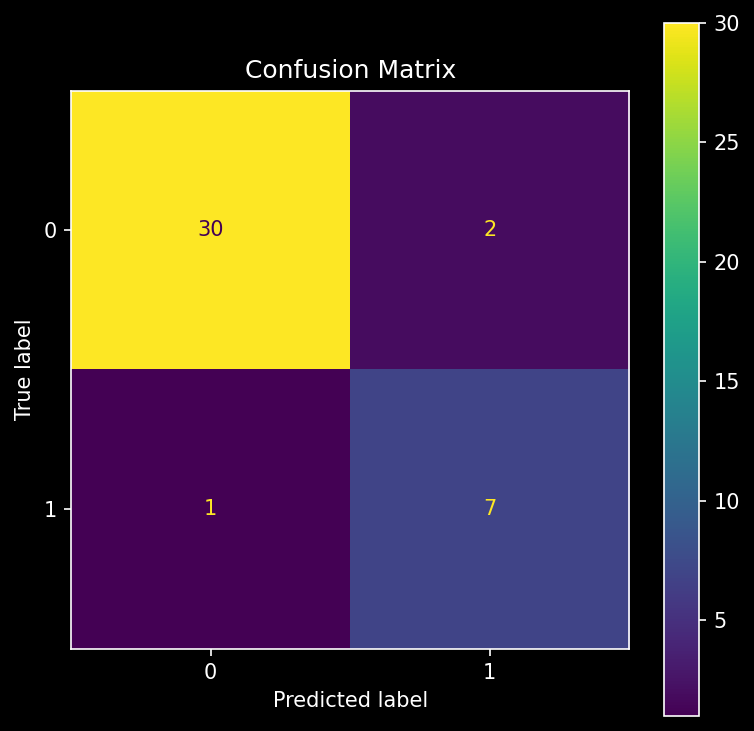

In [7]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay(cbc_con_matrix).plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Cat_Boosting_Classification.png", bbox_inches="tight"
)

In [8]:
y_score = cbc.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

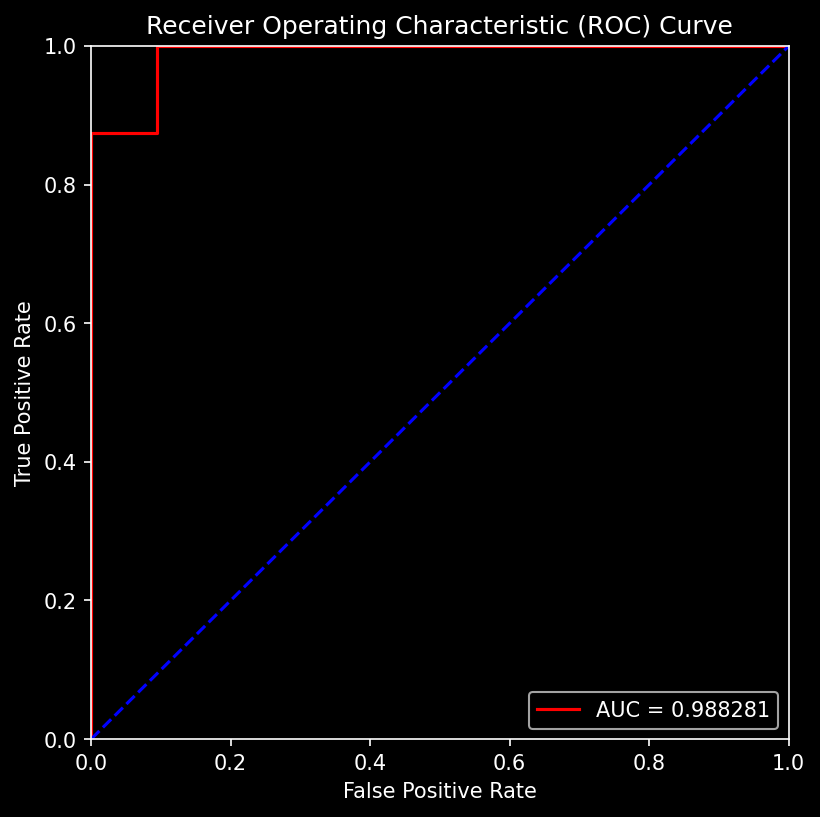

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.plot(false_positive_rate, true_positive_rate, "r", label="AUC = %f" % roc_auc)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.savefig("Images/ROC_Curve_Cat_Boosting_Classification.png", bbox_inches="tight")

In [10]:
print(
    "Area Under the Receiver Operating Characteristic Curve :",
    roc_auc_score(y_test, y_score),
)

Area Under the Receiver Operating Characteristic Curve : 0.98828125


In [11]:
dump(cbc, "../../../../Models/catBoostingClassifier.joblib")

['../../../../Models/catBoostingClassifier.joblib']